#### Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

#### Data Display

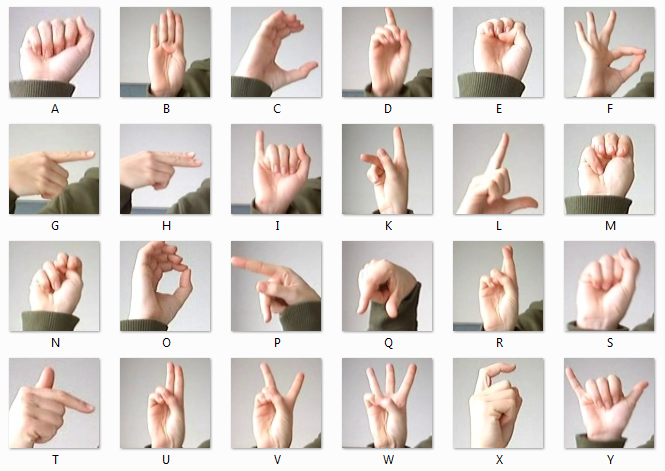

In [5]:
from IPython.display import Image
Image("amer_sign2.png")

#### Data Loading

In [7]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [11]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [13]:
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

#### Data Preprocessing

In [14]:
X = train.drop(columns=['label']).values
y = train['label'].values

In [15]:
X = X.reshape(-1, 28, 28, 1)
X = X / 255.0

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_images(X,y, num_samples=5):
    plt.figure(figsize=(10,5))
    for i in range(num_samples):
        index = np.random.radiant(0,len(X))

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X[index].reshape(28,28), cmap = 'gray')
    plt.axis('off')

    plt.title(f'Label : {y[index]}')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### Data Splitting

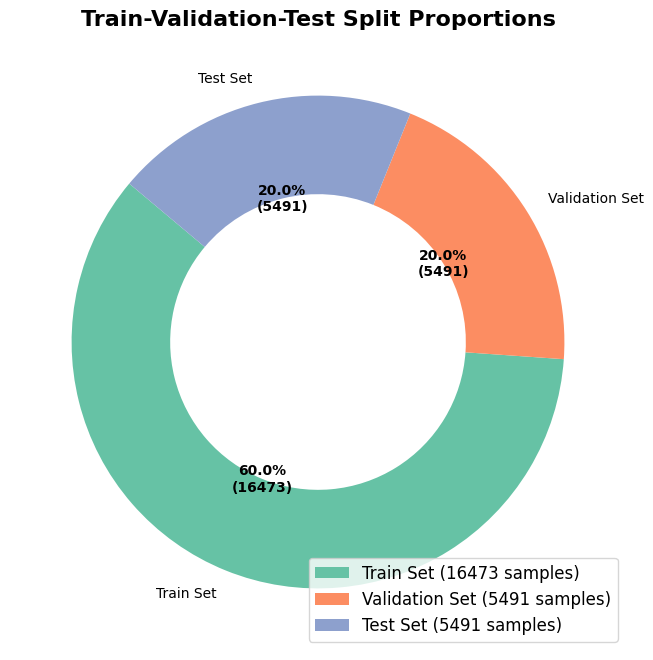

In [31]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42)

def plot_train_val_test_split_pie(X_train,X_val, X_test):
    train_size = len(X_train)
    val_size = len(X_val)
    test_size = len(X_test)

    labels = ['Train Set','Validation Set','Test Set']
    sizes = [train_size, val_size, test_size]
    colors = ['#66c2a5','#fc8d62','#8da0cd']

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct=lambda p: f'{p:.1f}%\n({int(p / 100 * sum(sizes))})', 
        startangle=140, 
        colors=colors, 
        wedgeprops=dict(width=0.4)
    )

    # Customize text appearance
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)

    # Add a title
    plt.title('Train-Validation-Test Split Proportions', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=10, weight="bold")

    # Create a legend
    legend_elements = [Patch(facecolor=colors[0], label=f'Train Set ({train_size} samples)'),
                       Patch(facecolor=colors[1], label=f'Validation Set ({val_size} samples)'),
                       Patch(facecolor=colors[2], label=f'Test Set ({test_size} samples)')]
    ax.legend(handles=legend_elements, loc='best', fontsize=12)

    # Display the plot
    plt.show()

# Call the function to visualize the train-validation-test split
plot_train_val_test_split_pie(X_train, X_val, X_test)

    

#### Model Defining

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(25, activation='softmax')  # Assuming 25 sign classes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',            
    patience=3,                    
    restore_best_weights=True,    
    verbose=1                      
)

#### Model Training

In [33]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),  
    callbacks=[early_stopping]   # Include the early stopping callback
)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5207 - loss: 1.5226 - val_accuracy: 0.8130 - val_loss: 0.5655
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5207 - loss: 1.5226 - val_accuracy: 0.8130 - val_loss: 0.5655
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9187 - loss: 0.2643 - val_accuracy: 0.9603 - val_loss: 0.1277
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9187 - loss: 0.2643 - val_accuracy: 0.9603 - val_loss: 0.1277
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9849 - loss: 0.0654 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9849 - loss: 0.0654 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9970 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9970 - loss: 0.0179 - val_accuracy: 

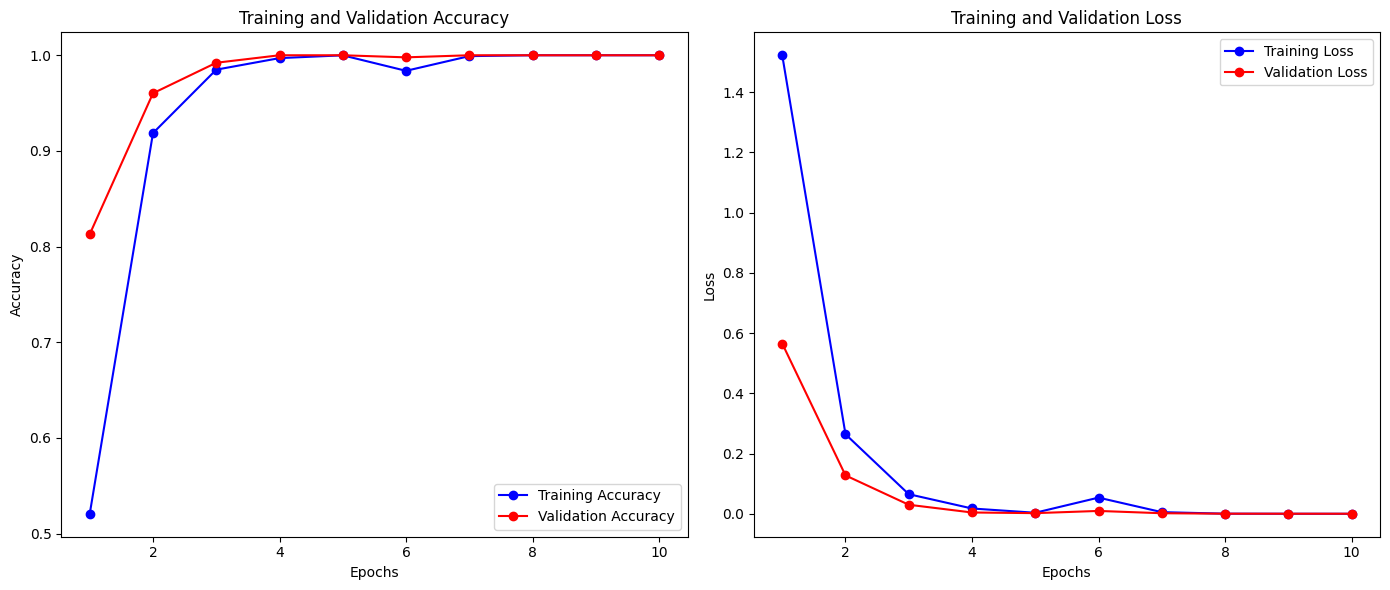

In [34]:
# Plotting accuracy and loss
def plot_training_history(history):
    # Get the values from the training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training & validation accuracy
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss graphs
plot_training_history(history)

#### Model Evaluation

In [35]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Test accuracy: {val_acc}')

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.6619e-04
Test accuracy: 1.0
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.6619e-04
Test accuracy: 1.0


In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5944e-04
Test accuracy: 1.0
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5944e-04
Test accuracy: 1.0


#### Predictions

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


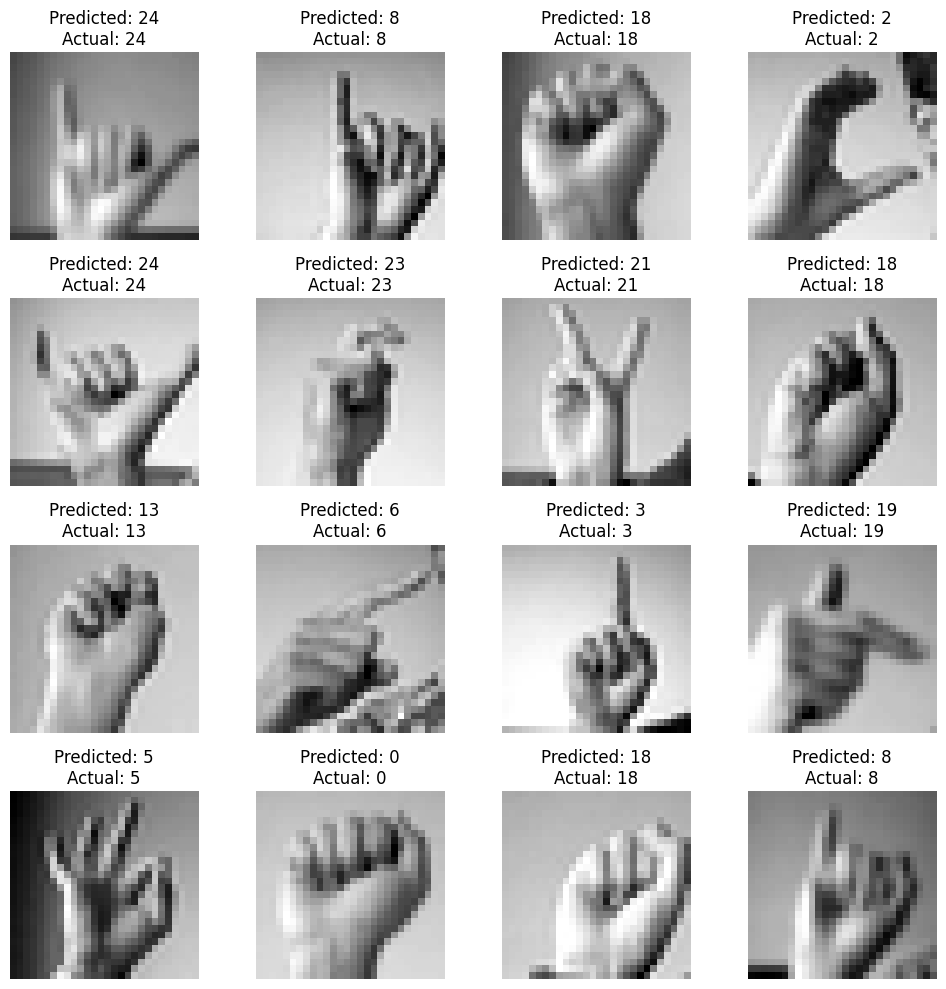

In [37]:
# Predict on the test set
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Plot some of the test images with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


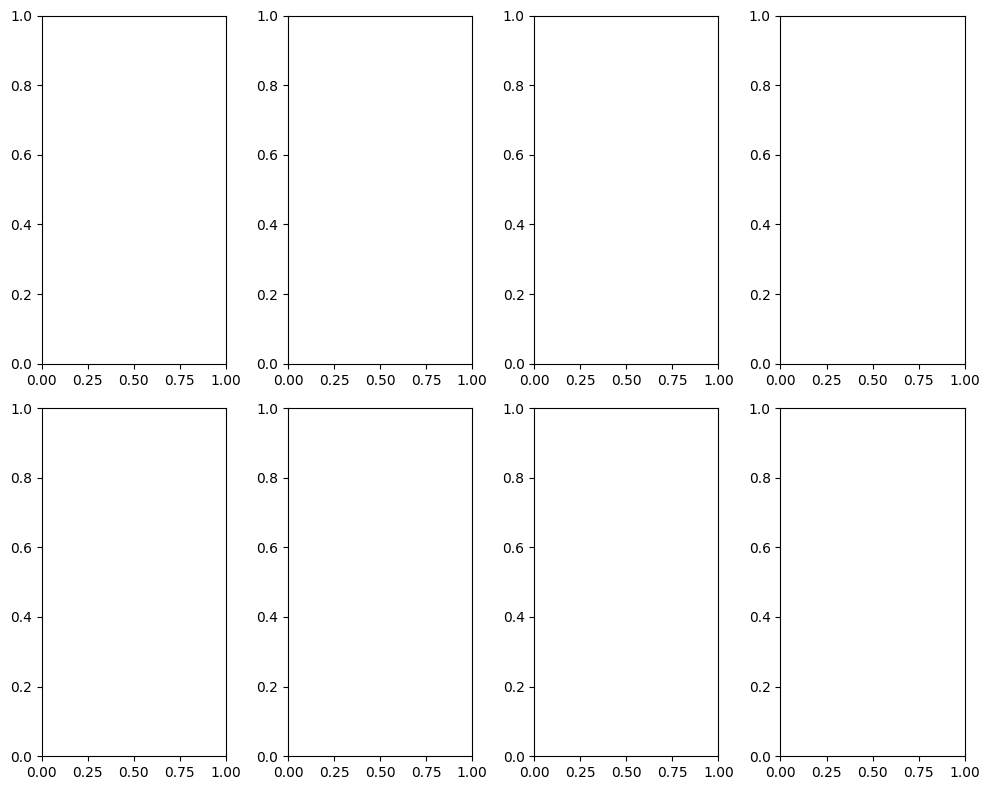

In [38]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Identify incorrect predictions
incorrect_indices = np.where(y_pred_classes != y_test)[0]

# Number of errors to display
num_errors_to_display = 8  

# Create a figure with a 2x4 grid layout
fig, axes = plt.subplots(2, 4, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(min(num_errors_to_display, len(incorrect_indices))):
    idx = incorrect_indices[i]
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted: {y_pred_classes[idx]}\nActual: {y_test[idx]}')
    axes[i].axis('off')

# Turn off any remaining unused axes
for j in range(num_errors_to_display, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()